Challenge from:
https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/

# Time series analysis:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
% matplotlib inline

In [4]:
! dir

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 48E8-1CA4

 Directorio de C:\Users\SynergicTemp\Downloads\5 - Time_Series

11/07/2018  12:39    <DIR>          .
11/07/2018  12:39    <DIR>          ..
05/07/2018  13:49    <DIR>          .ipynb_checkpoints
05/07/2018  10:19                10 Sample_Submission_QChS6c3.csv
05/07/2018  10:19           122.701 Test_0qrQsBZ.csv
11/07/2018  12:39         1.744.960 Time_series.ipynb
05/07/2018  10:19           489.054 Train_SU63ISt.csv
               4 archivos      2.356.725 bytes
               3 dirs  394.707.390.464 bytes libres


In [5]:
data = pd.read_csv('Train_SU63ISt.csv', index_col=0)

In [6]:
data.head()

,Datetime,Count
ID,,
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [7]:
data.dtypes

Datetime    object
Count        int64
dtype: object

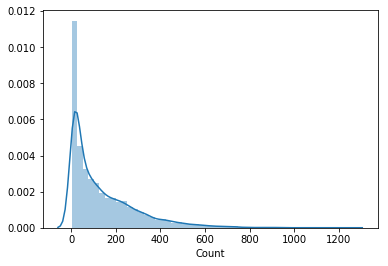

In [8]:
sns.distplot(data['Count'])

In [9]:
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d-%m-%Y %H:%M')

In [10]:
#Convert into Datetime format
# data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d-%n-%Y %H:%M')

# Change format:
# data['Datetime'] = data['Datetime'].dt.strftime('%m/%d/%Y')

In [11]:
data['Datetime'].head(10)

ID
0   2012-08-25 00:00:00
1   2012-08-25 01:00:00
2   2012-08-25 02:00:00
3   2012-08-25 03:00:00
4   2012-08-25 04:00:00
5   2012-08-25 05:00:00
6   2012-08-25 06:00:00
7   2012-08-25 07:00:00
8   2012-08-25 08:00:00
9   2012-08-25 09:00:00
Name: Datetime, dtype: datetime64[ns]

In [12]:
data['Day_of_week'] = data['Datetime'].dt.dayofweek

In [13]:
data[['Day_of_week', 'Count']].groupby('Day_of_week').sum()

,Count
Day_of_week,
0,412916
1,430988
2,427022
3,407250
4,375122
5,251292
6,236676


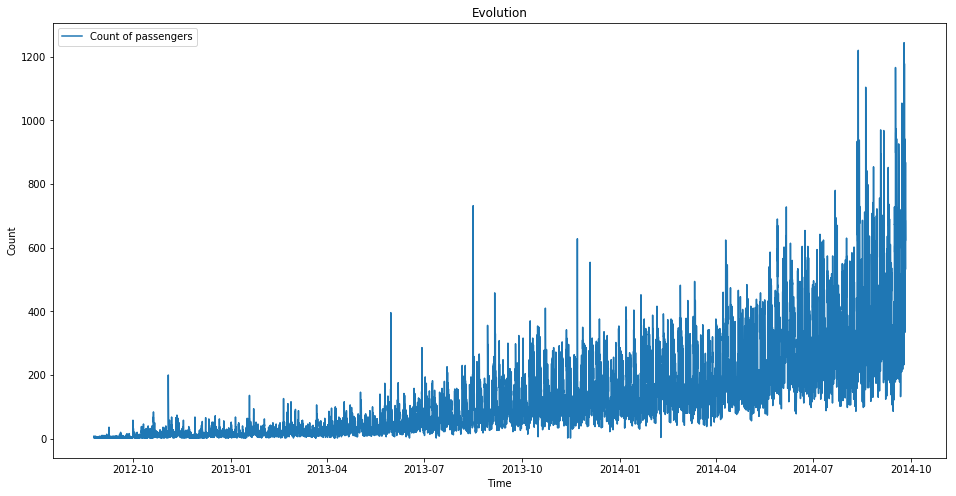

In [14]:
plt.figure(figsize=(16,8))
plt.plot(data['Datetime'], data['Count'], label='Count of passengers')
plt.title('Evolution')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend(loc='best')

In [15]:
data['Month'] = data['Datetime'].dt.month
data['Year'] = data['Datetime'].dt.year

In [16]:
data[['Month', 'Count']].groupby('Month').agg(['mean', 'sum'])

Count        
             mean     sum
Month                    
1       92.817204  138112
2      111.196429  149448
3      103.791667  154442
4      137.680556  198260
5      155.055108  230722
6      186.723611  268882
7      209.071237  311098
8      220.497585  365144
9      181.958824  371196
10      75.459677  112284
11      78.413889  112916
12      86.533602  128762

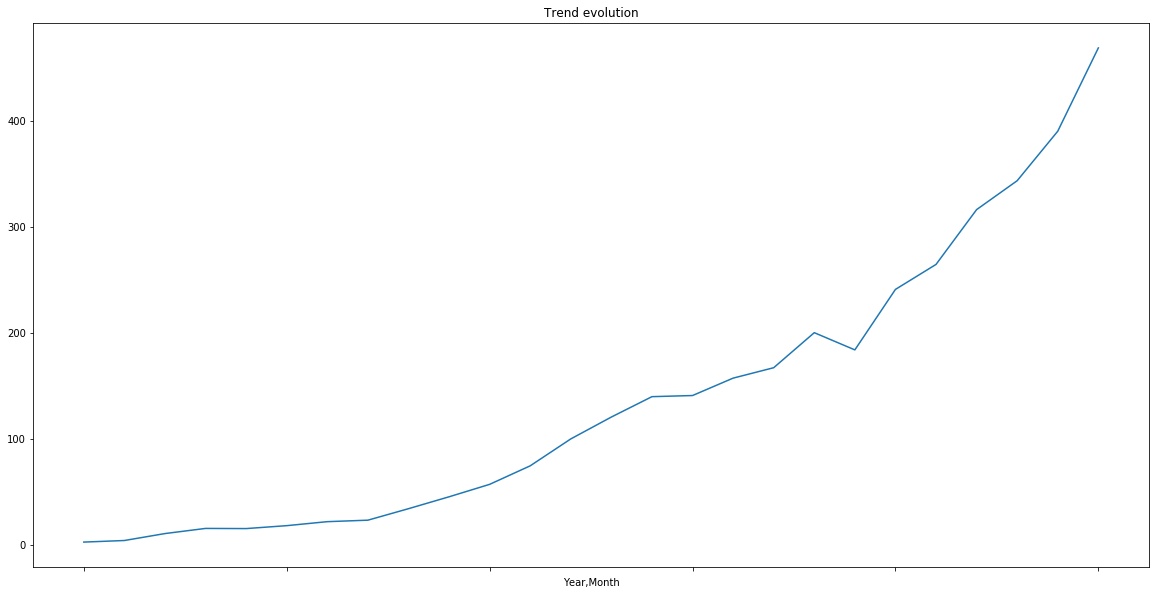

In [17]:
#Trend analysis:
t = data.groupby(['Year', 'Month'])['Count'].mean()
t.plot(figsize=(20,10), title='Trend evolution')

In [18]:
time = data.copy()

In [19]:
hourly = time[['Datetime', 'Count']].resample('H', on='Datetime').mean()
daily = time[['Datetime', 'Count']].resample('D', on='Datetime').mean()
weekly = time[['Datetime', 'Count']].resample('W', on='Datetime').mean()
monthly = time[['Datetime', 'Count']].resample('M', on='Datetime').mean()

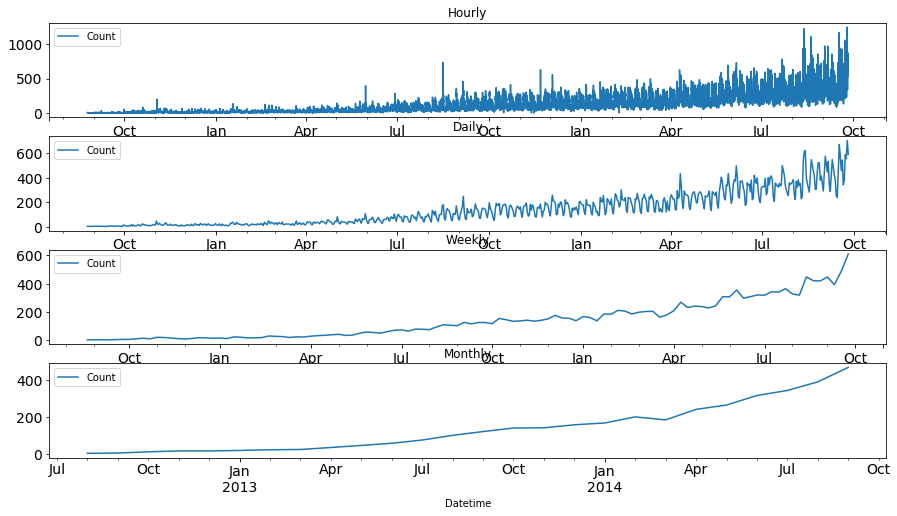

In [20]:
fig, axs = plt.subplots(4,1)

hourly.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])

We can see that the best approximation is to take the daily evolution

### Split in validation and train

In [21]:
data['Datetime'].max()

Timestamp('2014-09-25 23:00:00')

In [22]:
data['Datetime'].min()

Timestamp('2012-08-25 00:00:00')

We choose to validate with the last 2 months.

In [23]:
validation = data[data['Datetime']>='2014-07-01']

In [24]:
train = data[data['Datetime']<'2014-07-01']

In [25]:
# Resample into days

validation_days = validation[['Datetime', 'Count']].resample('D', on='Datetime').mean()
train_days = train[['Datetime', 'Count']].resample('D', on='Datetime').mean()

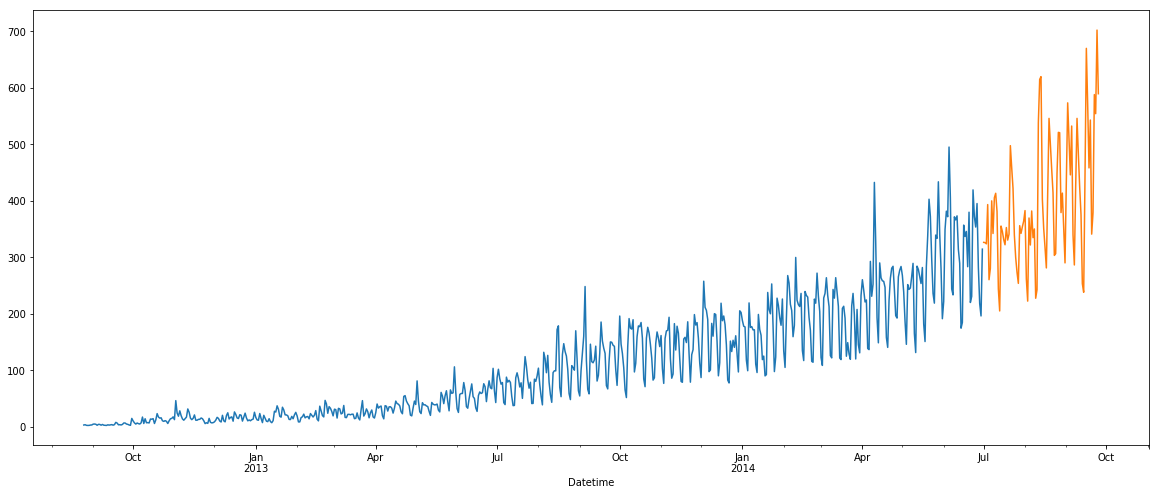

In [26]:
# Let's plot it
plt.figure(figsize=(20,8))
train_days['Count'].plot()
validation_days['Count'].plot();

# Modeling Techniques

Naive Approach

Moving Average

Simple Exponential Smoothing

Holt’s Linear Trend Model

Holt’s Winter

ARIMA

SARIMA

### Naive Approach:

The next expected value is the same as the previous point.

In [27]:
y = train_days['Count'].tail(1)[0]

In [28]:
y_forecasted = pd.DataFrame(np.full(len(validation_days),y), index=validation_days.index, columns=['Count'] )

In [29]:
y_forecasted.head()

,Count
Datetime,
2014-07-01,314.5
2014-07-02,314.5
2014-07-03,314.5
2014-07-04,314.5
2014-07-05,314.5


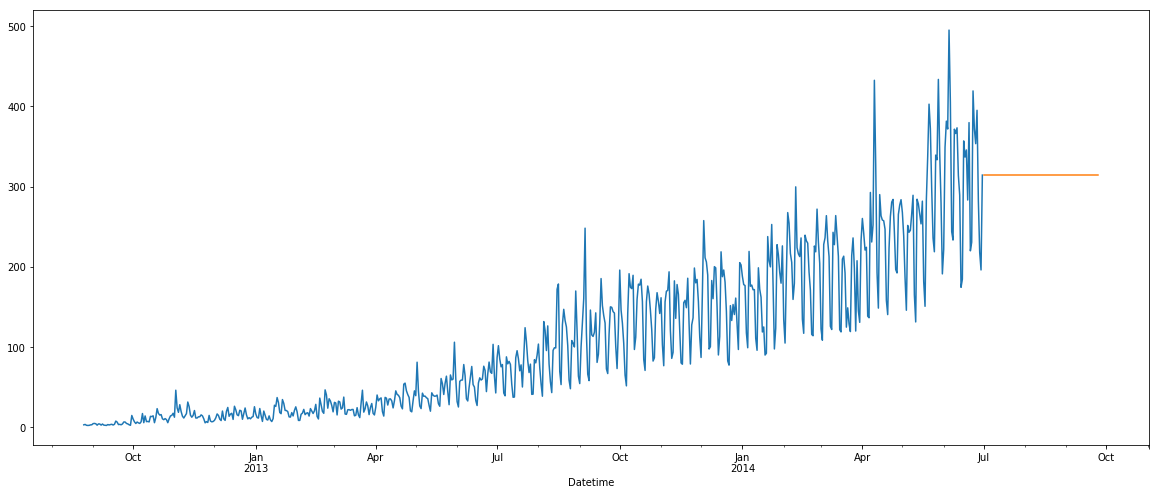

In [30]:
plt.figure(figsize=(20,8))
train_days['Count'].plot()
y_forecasted['Count'].plot()

#### Scoring

In [31]:
mean_absolute_error(validation_days['Count'], y_forecasted['Count'])

102.79406130268198

In [32]:
mean_squared_error(validation_days['Count'], y_forecasted['Count'])

18653.88274265645

In [33]:
rmse = np.sqrt(18653.88)
print('El error es %.2f' %rmse)

El error es 136.58


### Moving average:

We will take the average of the counts for the last X time periods.

Let's set X to 10 periods.

In [34]:
train_days.head()

,Count
Datetime,
2012-08-25,3.166667
2012-08-26,3.666667
2012-08-27,2.583333
2012-08-28,2.416667
2012-08-29,2.500000


In [35]:
train_vector = np.array(train_days['Count'])
train_vector[-10:]

validation_days_vector = np.array(validation_days['Count']) # Real predictions

In [36]:
import collections     # to create a stack

def calculate_mean(vector):
    return np.mean(vector)

y_forecasted = []


def calculate_forecast(vector): # We must pass the last 10 values
    q = collections.deque(vector) # Create the stack of 10 elements
    pos = 0
    
    while len(y_forecasted)<=len(validation_days):
        mean = calculate_mean(q)       
        
        if pos >= len(validation_days_vector):
            return y_forecasted
        else:
            y_forecasted.append(mean) # We get the prediction
            # Now the stack of X elements will be upgraded with the real value
            q.append(validation_days_vector[pos])#A dd the real value to the stack on the right side
            q.popleft() # Remove the element from the left
        pos += 1

In [37]:
y_forecasted = calculate_forecast(train_vector[-10:])

In [38]:
y_forecasted = pd.DataFrame(y_forecasted, index=validation_days.index, columns=['Count'] )

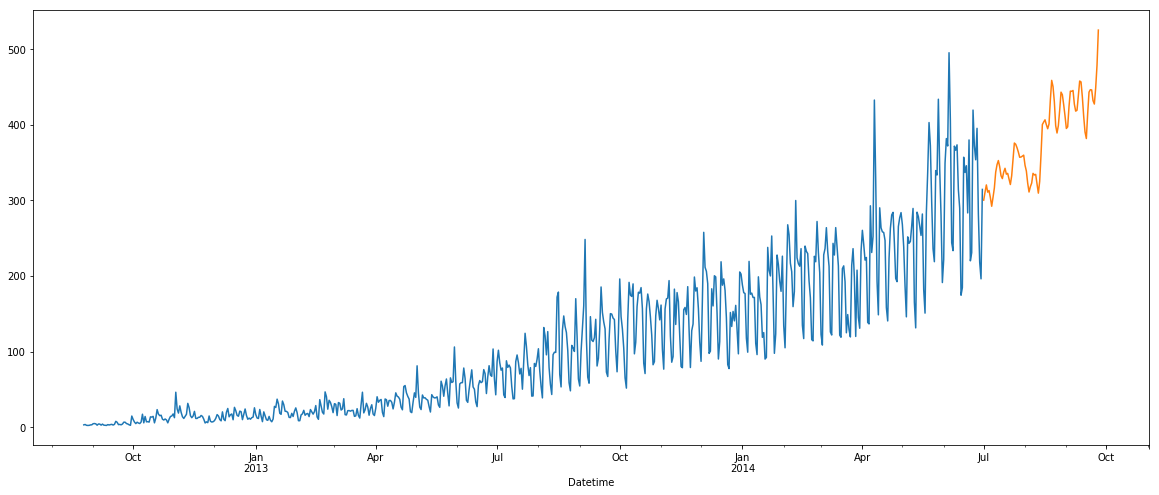

In [39]:
plt.figure(figsize=(20,8))
train_days['Count'].plot()
y_forecasted['Count'].plot()

#### Scoring

In [40]:
mean_squared_error(validation_days['Count'], y_forecasted['Count'])

10593.291639527457

In [41]:
np.sqrt(mean_squared_error(validation_days['Count'], y_forecasted['Count']))

102.92371757533566

We can see that with this aproximation we minimize the error.

### Simple Exponential Smoothing

We assign more weight to the recent observations. This weights decrease exponentially.

In [42]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [43]:
SES = SimpleExpSmoothing(train_days['Count']).fit(smoothing_level=0.6,optimized=False)
y_forecasted = SES.forecast(len(validation_days))

In [44]:
y_forecasted = pd.DataFrame(y_forecasted, index=validation_days.index ,columns=['Count'])

In [45]:
y_forecasted.head()

,Count
Datetime,
2014-07-01,277.326556
2014-07-02,277.326556
2014-07-03,277.326556
2014-07-04,277.326556
2014-07-05,277.326556


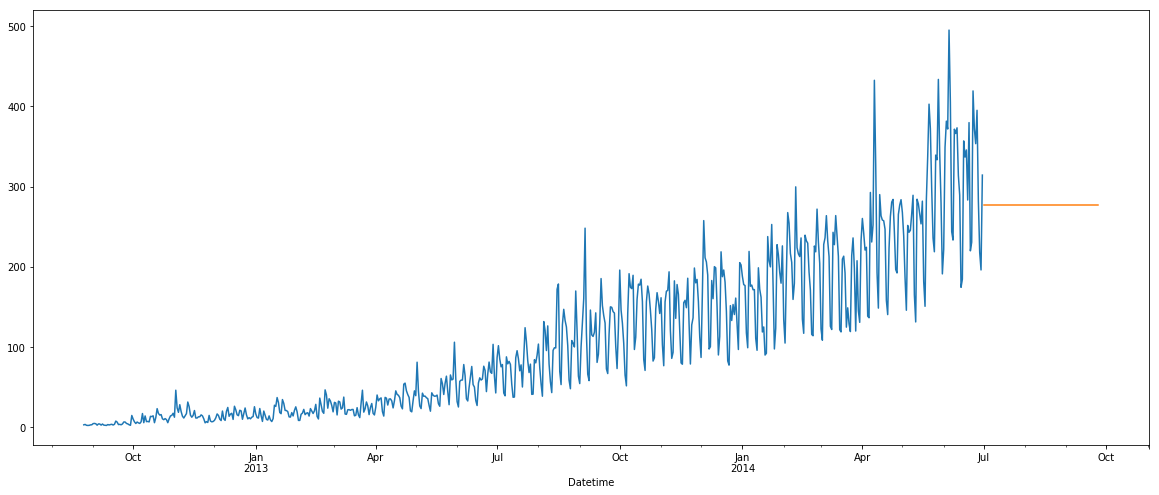

In [46]:
plt.figure(figsize=(20,8))
train_days['Count'].plot()
y_forecasted['Count'].plot()

In [47]:
mean_absolute_error(validation_days['Count'], y_forecasted['Count'])

127.0424197509839

In [48]:
np.sqrt(mean_absolute_error(validation_days['Count'], y_forecasted['Count']))

11.271309584559546

### Holt’s Linear Trend Model

It is an extension of simple exponential smoothing to allow forecasting of data with a trend.

In [49]:
# Decomposition of the component of the time series:

import statsmodels.api as sm

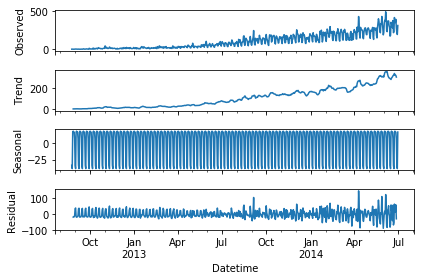

In [50]:
sm.tsa.seasonal_decompose(train_days['Count']).plot()
plt.show()

In [51]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt

In [52]:
HLTM = Holt(train_days['Count']).fit(smoothing_level=0.3, smoothing_slope=0.01)
y_forecasted = HLTM.forecast(len(validation_days))

In [53]:
y_forecasted = pd.DataFrame(y_forecasted, index=validation_days.index, columns=['Count'])
y_forecasted.head()

,Count
Datetime,
2014-07-01,284.757892
2014-07-02,285.278642
2014-07-03,285.799392
2014-07-04,286.320143
2014-07-05,286.840893


In [54]:
y_forecasted.tail()

,Count
Datetime,
2014-09-21,327.459412
2014-09-22,327.980163
2014-09-23,328.500913
2014-09-24,329.021663
2014-09-25,329.542413


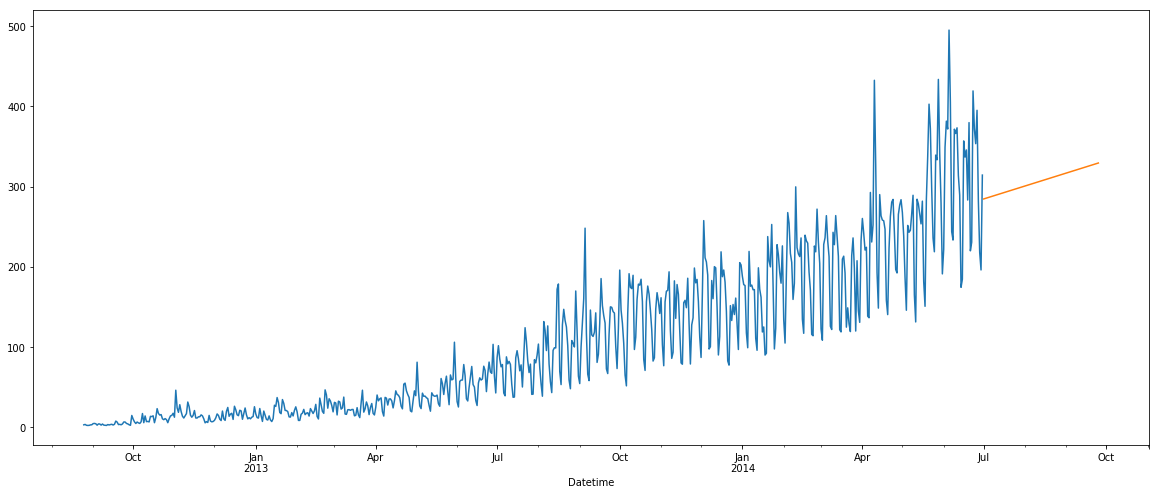

In [55]:
plt.figure(figsize=(20,8))
train_days['Count'].plot()
y_forecasted['Count'].plot();

In [56]:
mean_absolute_error(validation_days['Count'], y_forecasted['Count'])

106.06862693517346

In [57]:
np.sqrt(mean_absolute_error(validation_days['Count'], y_forecasted['Count']))

10.298962420320478

### Holt’s Winter

Extension of Holt's algorithm which add the effect of seasonality

In [58]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [59]:
HW = ExponentialSmoothing(train_days['Count'], trend='add', seasonal='add', seasonal_periods=7).fit()
y_forecasted = HW.forecast(len(validation_days))

In [60]:
y_forecasted = pd.DataFrame(y_forecasted, index=validation_days.index, columns=['Count'])

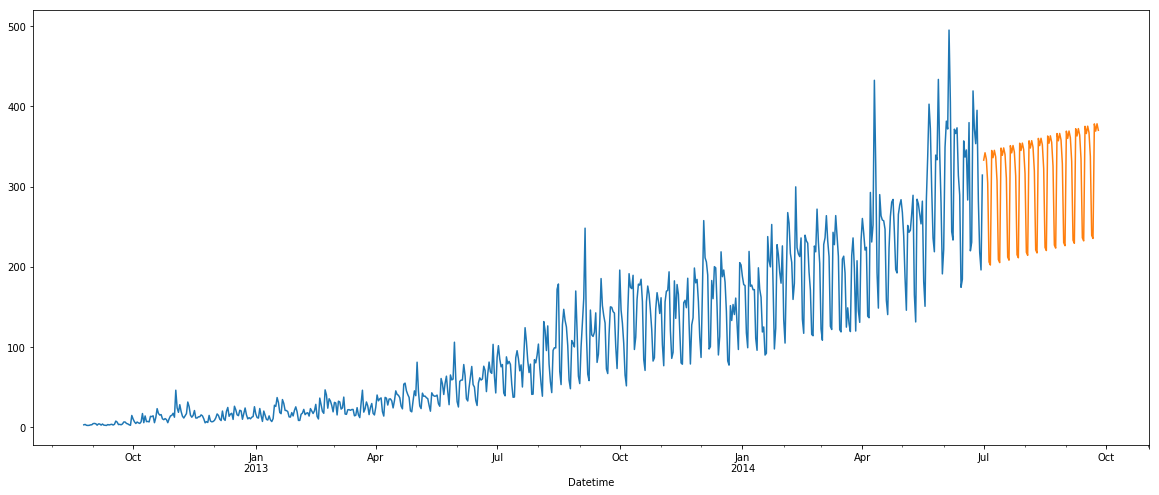

In [61]:
plt.figure(figsize=(20,8))
train_days['Count'].plot()
y_forecasted['Count'].plot();

In [62]:
mean_absolute_error(validation_days['Count'], y_forecasted['Count'])

84.80248425044621

In [63]:
np.sqrt(mean_absolute_error(validation_days['Count'], y_forecasted['Count']))

9.208826431768937

## Time series exploration:

#### Dickey-Fuller test (check stationarity)

There are three basic criterion for a series to be classified as stationary series :

- The mean of the time series should not be a function of time. It should be constant.

- The variance of the time series should not be a function of time.

- The covariance of the ith term and the (i+m)th term should not be a function of time.

We make the series stationary to make the variables independent. Variables can be dependent in various ways, but can only be independent in one way. So, we will get more information when they are independent. Hence the time series must be stationar. For doing so, we need to remove the trend and seasonality from the data

In [64]:
from statsmodels.tsa.stattools import adfuller

In [65]:
output = adfuller(data['Count'])
output

(-4.456560536856815,
 0.00023540466467666168,
 45,
 18242,
 {'1%': -3.430708525404171,
  '10%': -2.5668543412994906,
  '5%': -2.861698454786869},
 181026.8337109476)

In [66]:
output = pd.Series(output[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
output

Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
dtype: float64

If Test Statistics < Critical value(1%,5%,10%) time series is stationary.

-4.45 < -3.47  -> Is Stationary

We want to make the TS more stationary so we will:

#### Remove trend, (moving average):

In [67]:
data.index = data['Datetime']

In [68]:
r_mean = data['Count'].rolling(window=24, center=False).mean() #Rolling mean 

In [69]:
r_mean.index = data.index

In [70]:
r_mean = r_mean.dropna()

In [71]:
r_mean.head()

Datetime
2012-08-25 23:00:00    3.166667
2012-08-26 00:00:00    3.000000
2012-08-26 01:00:00    3.166667
2012-08-26 02:00:00    3.000000
2012-08-26 03:00:00    3.083333
Name: Count, dtype: float64

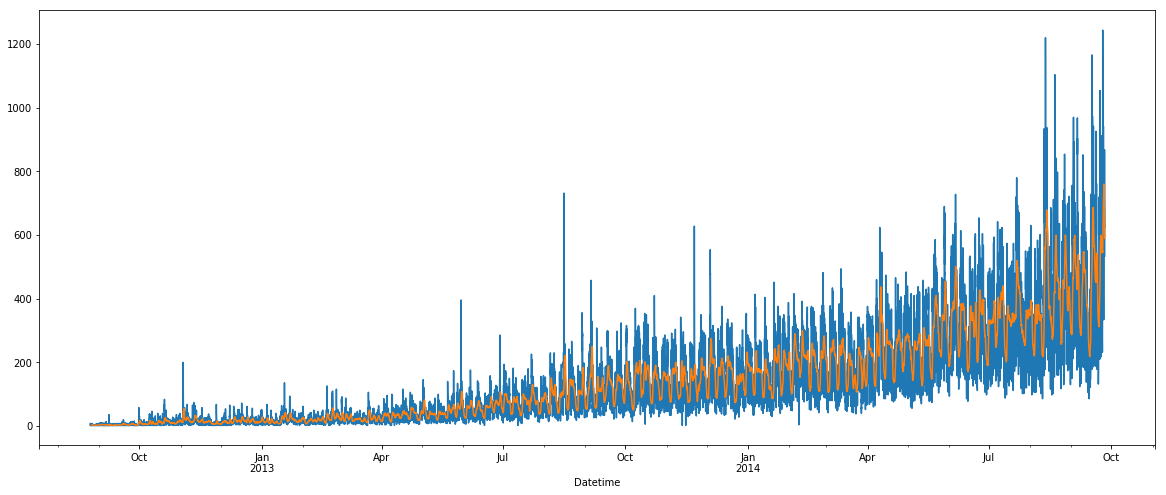

In [72]:
plt.figure(figsize=(20,8))
data['Count'].plot()
r_mean.plot();

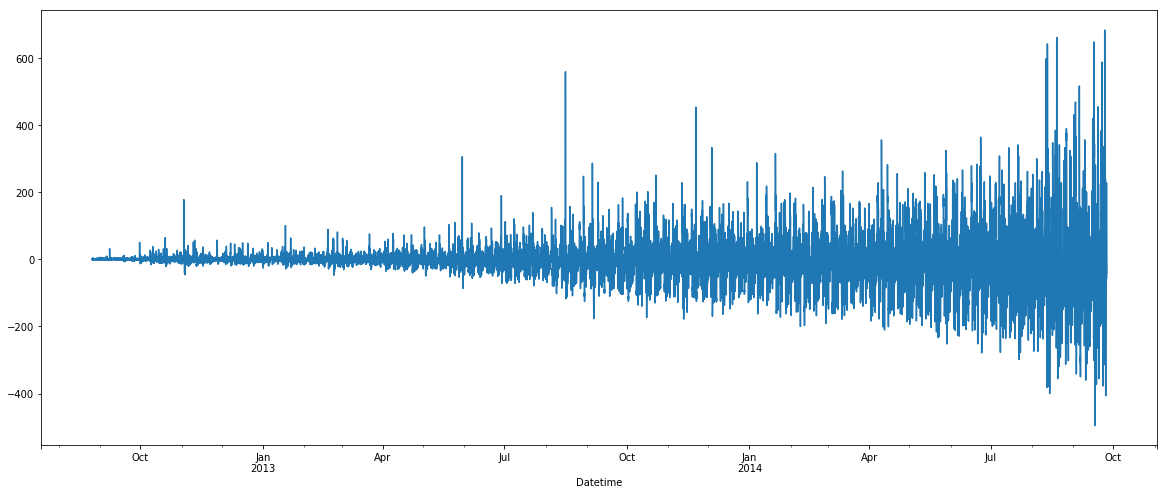

In [73]:
#Removing trend:
Stational = data['Count']-r_mean
plt.figure(figsize=(20,8))
Stational.plot()

In [74]:
adfuller(Stational.dropna())

(-20.38671664065388,
 0.0,
 45,
 18219,
 {'1%': -3.430708978077016, '10%': -2.566854447784165, '5%': -2.8616986548392},
 179361.64065260638)

As we can see now Test Statistic (-20.386) is <<< Critical value, this means that the Series is more stationary than before.

#### Remove trend, (Exponential weigthed moving average):

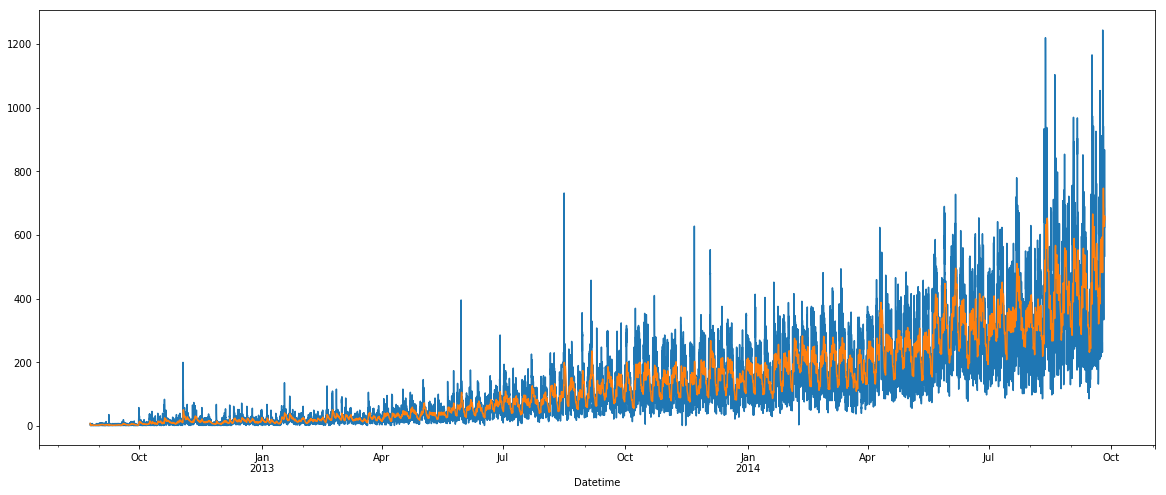

In [75]:
r_exp_mean = data['Count'].ewm(halflife=12).mean()

plt.figure(figsize=(20,8))
data.Count.plot()
r_exp_mean.plot()

In [76]:
Stational_exp = data['Count']- r_exp_mean

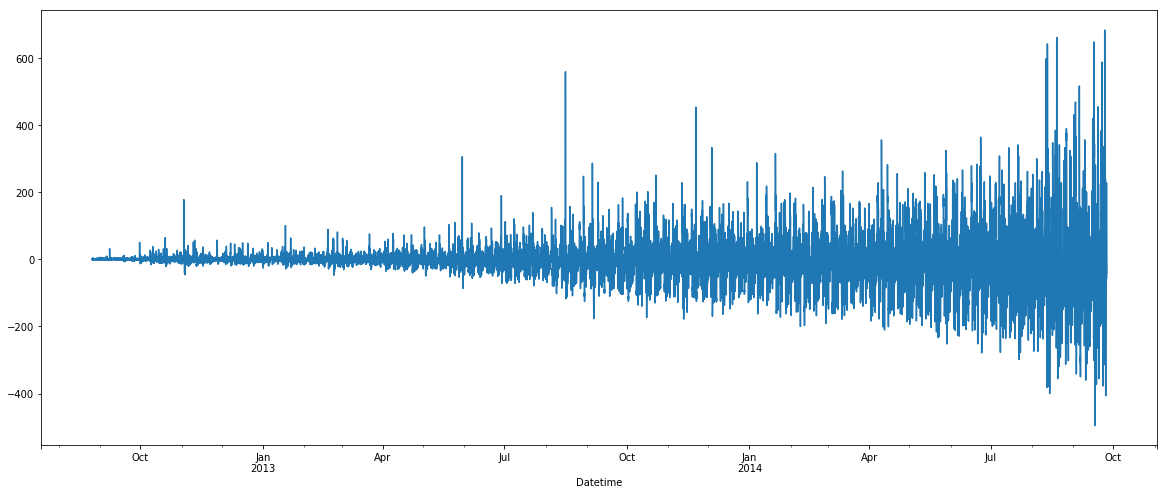

In [77]:
Stational.plot(figsize=(20,8))

In [78]:
adfuller(Stational_exp.dropna())

(-19.659592878860206,
 0.0,
 45,
 18242,
 {'1%': -3.430708525404171,
  '10%': -2.5668543412994906,
  '5%': -2.861698454786869},
 178928.0504864415)

#### Removing trend (differencing):

We take the difference of the observation at a particular instant with that at the previous instant

In [79]:
r_diff = data['Count']-data['Count'].shift() # Shift(x) moves the index a number x of positions.

In [80]:
r_diff.head(7)

Datetime
2012-08-25 00:00:00    NaN
2012-08-25 01:00:00   -6.0
2012-08-25 02:00:00    4.0
2012-08-25 03:00:00   -4.0
2012-08-25 04:00:00    0.0
2012-08-25 05:00:00    0.0
2012-08-25 06:00:00    0.0
Name: Count, dtype: float64

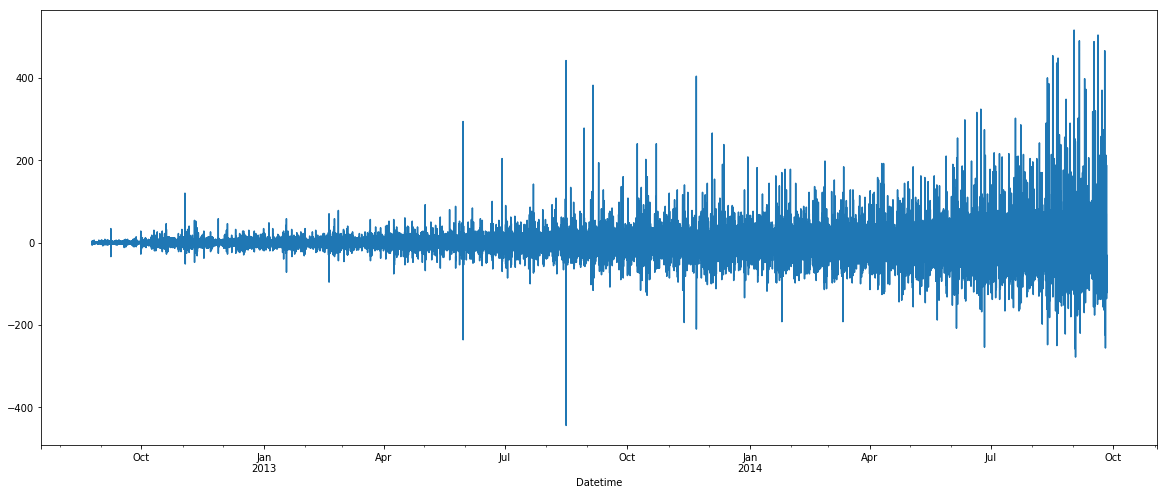

In [81]:
r_diff.plot(figsize=(20,8))

In [82]:
adfuller(r_diff.dropna())

(-29.142417042115607,
 0.0,
 45,
 18241,
 {'1%': -3.4307085450618584,
  '10%': -2.566854345923675,
  '5%': -2.8616984634743057},
 180973.63056513245)

### Decomposing:

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [84]:
decomposition = seasonal_decompose(data['Count'], freq=24)

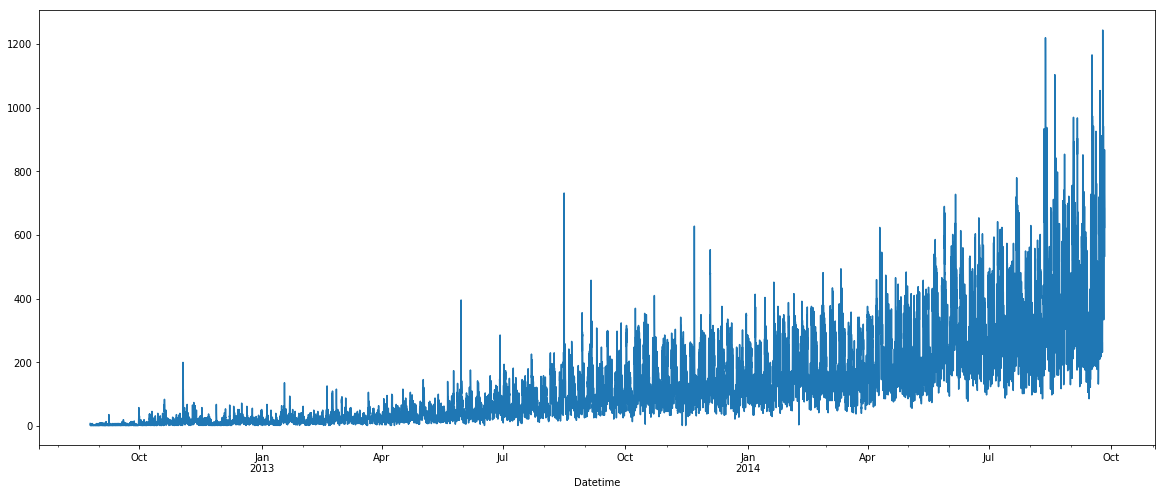

In [85]:
data.Count.plot(figsize=(20,8))

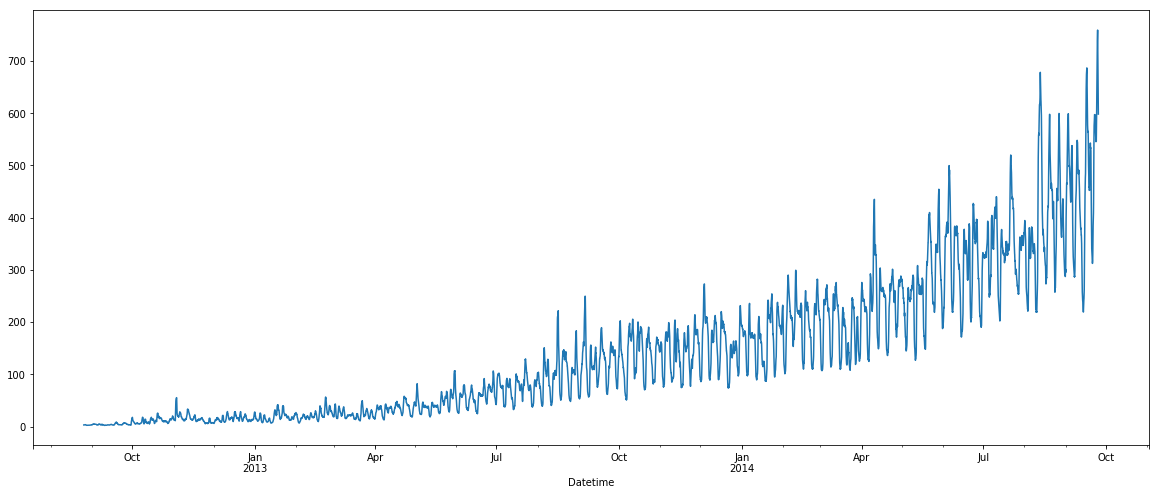

In [86]:
decomposition.trend.plot(figsize=(20,8))

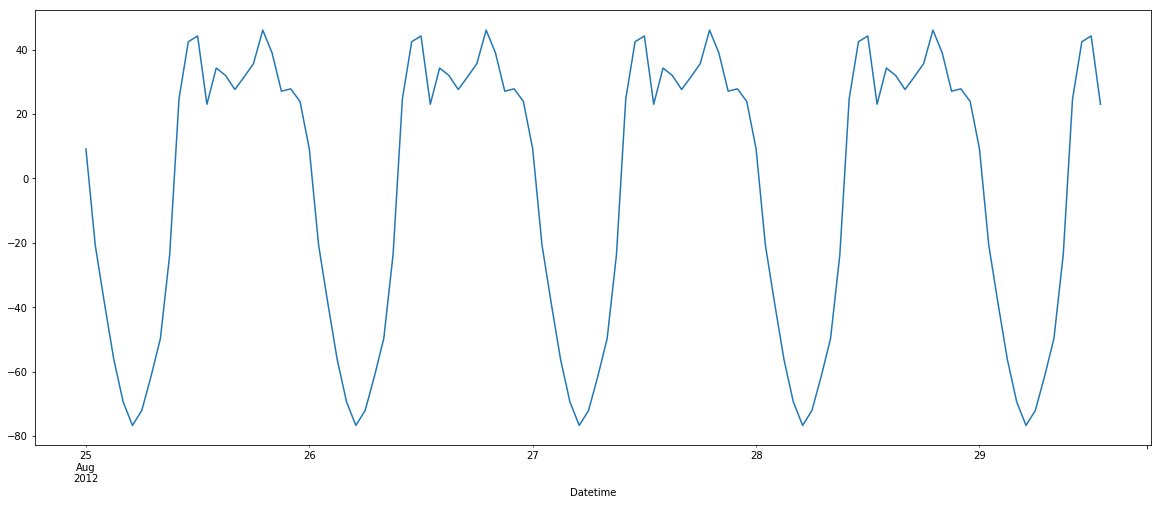

In [87]:
 decomposition.seasonal[0:110].plot(figsize=(20,8))

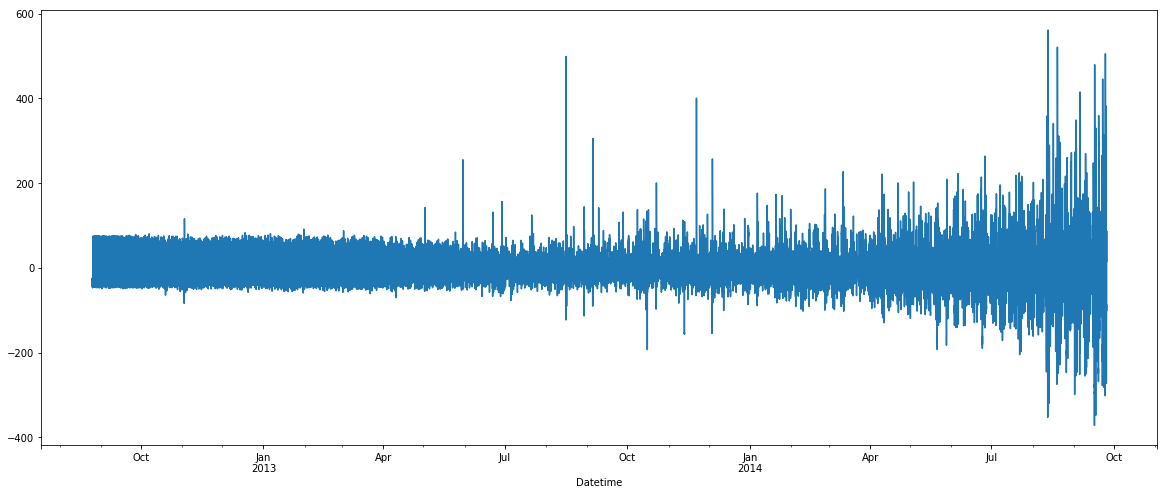

In [88]:
decomposition.resid.plot(figsize=(20,8))

## ARIMA / SARIMA (Seasonal Arima)

When the TS has a strong dependence among values, we need to use statistical models

ARIMA stands for Auto Regression Integrated Moving Average. It is specified by three ordered parameters (p,d,q).

__p__ is the order of the autoregressive model(number of time lags). For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5)

__d__ is the degree of differencing(number of times the data have had past values subtracted). 

__q__ is the order of moving average model. If q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

To determine the values of p and q we will use:

__Autocorrelation Function (ACF)__: It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

__Partial Autocorrelation Function (PACF)__: This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. E.g. at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4

In [89]:
from statsmodels.tsa.stattools import acf, pacf

In [90]:
#lagged version
r_diff = data['Count']-data['Count'].shift()

In [91]:
Aut_function = acf(r_diff.dropna(), nlags=25)

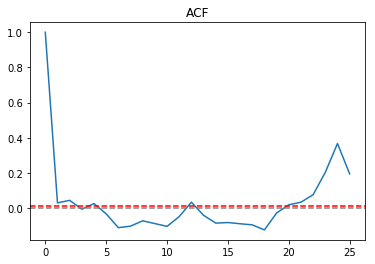

In [92]:
plt.plot(Aut_function)
plt.title('ACF')
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=1.96/np.sqrt(len(data['Count'])),linestyle='--', color='r') # Upper confidence interval
plt.show();

q value is the lag value (x) where the ACF crosses the confidence interval. In this case q = 3

In [93]:
Part_aut_function = pacf(r_diff.dropna(), nlags=25, method='ols')

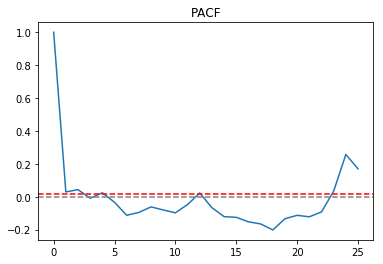

In [94]:
plt.plot(Part_aut_function)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=1.96/np.sqrt(len(data['Count'])),linestyle='--', color='red') # Upper confidence interval
plt.title('PACF')
plt.show();

p value is the lag value (x) where the PACF crosses the confidence interval. In this case p = 3

In [100]:
# We will create two arima models and then will combine them.
from statsmodels.tsa.arima_model import ARIMA

In [121]:
# AR Arima
model_arima = ARIMA(data['Count'], order=(3,1,3))

C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [122]:
fitted_model1 = model_arima.fit(disp=-1)

C:\Program Files\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Program Files\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [124]:
fitted_model1.forecast(steps=10)

(array([485.72219201, 440.95706666, 402.02324882, 370.75956373,
        348.44109366, 335.73447115, 332.69279963, 338.78816303,
        352.97752439, 373.79603476]),
 array([38.23412553, 52.38182925, 61.67387929, 68.00730853, 72.22709033,
        74.88750946, 76.42665386, 77.21089818, 77.5389958 , 77.63535247]),
 array([[410.78468298, 560.65970103],
        [338.29056788, 543.62356544],
        [281.14466662, 522.90183102],
        [237.46768831, 504.05143914],
        [206.8785979 , 490.00358942],
        [188.95764971, 482.51129259],
        [182.8993106 , 482.48628866],
        [187.45758337, 490.11874268],
        [201.00388523, 504.95116355],
        [221.63354   , 525.95852952]]))

The result of the forecast() function is an array containing the forecast value, the standard error of the forecast, and the confidence interval information

In [207]:
number_of_steps = 300

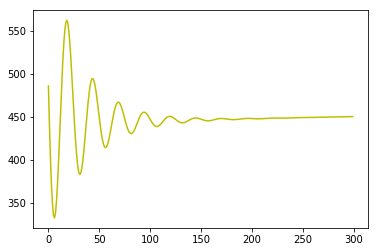

In [208]:
plt.plot(fitted_model1.forecast(steps=number_of_steps)[0], 'y')

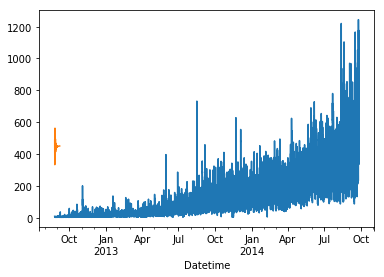

In [193]:
data['Count'].plot()
y_forecasted.plot()

We will have to use a __SARIMA model__, as we can see that the TS has seasonality.

In [117]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

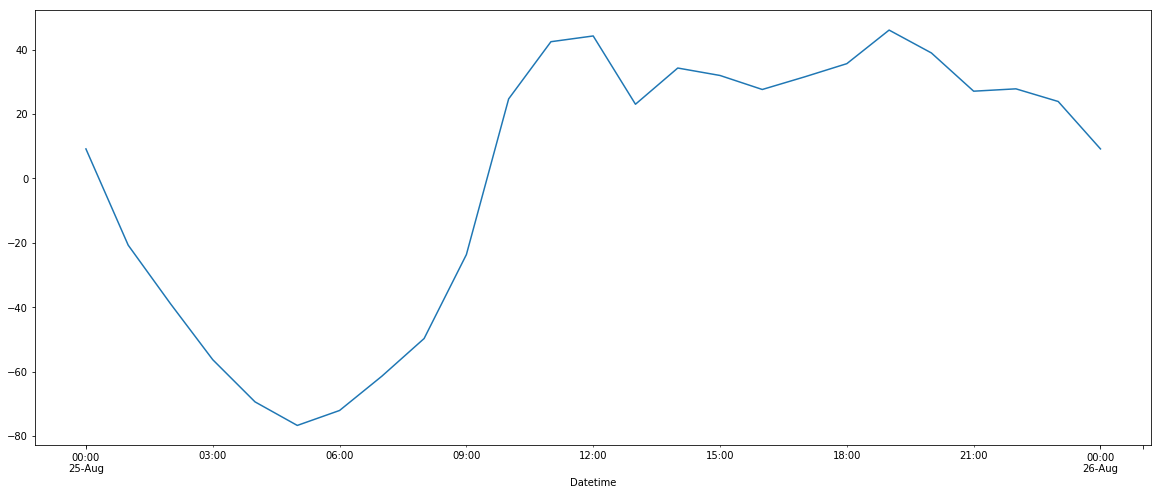

In [137]:
decomposition.seasonal[0:25].plot(figsize=(20,8))

In [144]:
model_sarima = SARIMAX(data['Count'], order=(3,1,3),seasonal_order=(0,0,0,25), enforce_stationarity=False, enforce_invertibility=False)

C:\Program Files\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [145]:
fitted_model2 = model_sarima.fit()

In [218]:
y_forecasted_sarima = pd.Series(fitted_model2.forecast(steps=number_of_steps), index=fitted_model2.forecast(steps=number_of_steps).index)

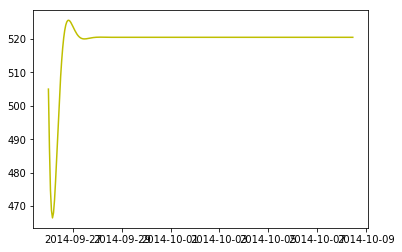

In [219]:
plt.plot(y_forecasted_sarima,'y')

### Graphs of forecast

#### SARIMA

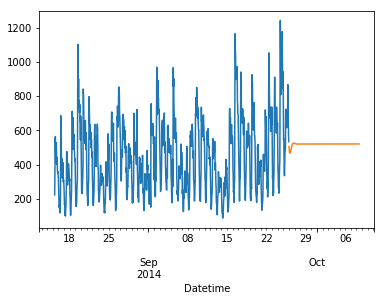

In [220]:
data['Count'].tail(1000).plot()
y_forecasted_sarima.plot()


#### ARIMA

In [214]:
y_forecasted = pd.Series(fitted_model1.forecast(steps=number_of_steps)[0], index=fitted_model2.forecast(steps=number_of_steps).index)

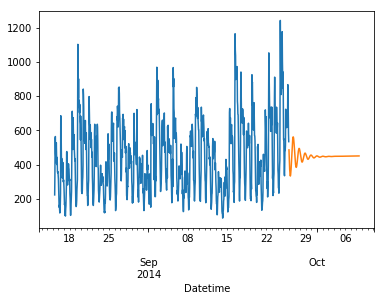

In [216]:
data['Count'].tail(1000).plot()
y_forecasted.plot()